In [2]:
pip install SQLAlchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:00:00:010:01
  Using cached greenlet-2.0.2.tar.gz (164 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for greenlet: filename=greenlet-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl size=190048 sha256=604caf92e4cb0ce6205209ca44d1be1e6f42a6b8b6a83c5405b9f5fbd32de30a
  Stored in directory: /Users/laura.chavez/Library/Caches/pip/wheels/c4/e2/38/932349e5e893e6d464ea70f98f76a8d7b9ba73e62cc9db5579
Successfully built greenlet
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymysql
from sqlalchemy import create_engine
import getpass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
password = getpass.getpass()

········


In [5]:
conection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(conection_string)

In [6]:
query1 = "SELECT film_id, release_year, language_id, rental_duration, rental_rate, length, rating, special_features FROM film;"
film = pd.read_sql(query1,engine)
film.head()

,film_id,release_year,language_id,rental_duration,rental_rate,length,rating,special_features
0,1,2006,1,6,0.99,86,PG,"Deleted Scenes,Behind the Scenes"
1,2,2006,1,3,4.99,48,G,"Trailers,Deleted Scenes"
2,3,2006,1,7,2.99,50,NC-17,"Trailers,Deleted Scenes"
3,4,2006,1,5,2.99,117,G,"Commentaries,Behind the Scenes"
4,5,2006,1,6,2.99,130,G,Deleted Scenes


In [7]:
query2 = "SELECT i.inventory_id, i.film_id, r.rental_id, r.rental_date FROM inventory i JOIN rental r ON i.inventory_id = r.inventory_id;"
rental = pd.read_sql(query2,engine)
rental.head()

,inventory_id,film_id,rental_id,rental_date
0,367,80,1,2005-05-24 22:53:30
1,1525,333,2,2005-05-24 22:54:33
2,1711,373,3,2005-05-24 23:03:39
3,2452,535,4,2005-05-24 23:04:41
4,2079,450,5,2005-05-24 23:05:21


In [8]:
df = rental.merge(film, how='outer', on='film_id')
df.head()

,inventory_id,film_id,rental_id,rental_date,release_year,language_id,rental_duration,rental_rate,length,rating,special_features
0,367.0,80,1.0,2005-05-24 22:53:30,2006,1,7,2.99,148,G,Trailers
1,367.0,80,1577.0,2005-06-16 04:03:28,2006,1,7,2.99,148,G,Trailers
2,367.0,80,3584.0,2005-07-06 04:16:43,2006,1,7,2.99,148,G,Trailers
3,364.0,80,4426.0,2005-07-07 22:28:32,2006,1,7,2.99,148,G,Trailers
4,366.0,80,8424.0,2005-07-29 07:06:03,2006,1,7,2.99,148,G,Trailers


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   inventory_id      16045 non-null  float64       
 1   film_id           16087 non-null  int64         
 2   rental_id         16045 non-null  float64       
 3   rental_date       16045 non-null  datetime64[ns]
 4   release_year      16087 non-null  int64         
 5   language_id       16087 non-null  int64         
 6   rental_duration   16087 non-null  int64         
 7   rental_rate       16087 non-null  float64       
 8   length            16087 non-null  int64         
 9   rating            16087 non-null  object        
 10  special_features  16087 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 1.4+ MB


In [10]:
df.isna().sum()

inventory_id        42
film_id              0
rental_id           42
rental_date         42
release_year         0
language_id          0
rental_duration      0
rental_rate          0
length               0
rating               0
special_features     0
dtype: int64

In [11]:
df = df.dropna()

In [13]:
X_num = df.select_dtypes(include=np.number)
X_num.drop(['language_id','release_year'], inplace=True, axis=1)

In [14]:
X_num

,inventory_id,film_id,rental_id,rental_duration,rental_rate,length
0,367.0,80,1.0,7,2.99,148
1,367.0,80,1577.0,7,2.99,148
2,367.0,80,3584.0,7,2.99,148
3,364.0,80,4426.0,7,2.99,148
4,366.0,80,8424.0,7,2.99,148
...,...,...,...,...,...,...
16040,4059.0,884,9651.0,5,4.99,88
16041,4058.0,884,9742.0,5,4.99,88
16042,4058.0,884,12213.0,5,4.99,88
16043,4059.0,884,13617.0,5,4.99,88


In [15]:
X_num.nunique()

inventory_id        4580
film_id              958
rental_id          16045
rental_duration        5
rental_rate            3
length               140
dtype: int64

In [16]:
X_cat = df.select_dtypes(exclude=np.number)
X_cat

,rental_date,rating,special_features
0,2005-05-24 22:53:30,G,Trailers
1,2005-06-16 04:03:28,G,Trailers
2,2005-07-06 04:16:43,G,Trailers
3,2005-07-07 22:28:32,G,Trailers
4,2005-07-29 07:06:03,G,Trailers
...,...,...,...
16040,2005-07-31 05:48:49,R,"Trailers,Deleted Scenes,Behind the Scenes"
16041,2005-07-31 09:10:20,R,"Trailers,Deleted Scenes,Behind the Scenes"
16042,2005-08-18 02:33:55,R,"Trailers,Deleted Scenes,Behind the Scenes"
16043,2005-08-20 06:35:30,R,"Trailers,Deleted Scenes,Behind the Scenes"


In [17]:
X_cat.nunique()

rental_date         15816
rating                  5
special_features       15
dtype: int64

In [18]:
X_cat['rating'].value_counts().keys()

Index(['PG-13', 'NC-17', 'PG', 'R', 'G'], dtype='object', name='rating')

In [19]:
le = LabelEncoder()
le.fit(['PG-13', 'NC-17', 'PG', 'R', 'G'])
X_cat['rating'] = le.transform(X_cat['rating'])
X_cat

,rental_date,rating,special_features
0,2005-05-24 22:53:30,0,Trailers
1,2005-06-16 04:03:28,0,Trailers
2,2005-07-06 04:16:43,0,Trailers
3,2005-07-07 22:28:32,0,Trailers
4,2005-07-29 07:06:03,0,Trailers
...,...,...,...
16040,2005-07-31 05:48:49,4,"Trailers,Deleted Scenes,Behind the Scenes"
16041,2005-07-31 09:10:20,4,"Trailers,Deleted Scenes,Behind the Scenes"
16042,2005-08-18 02:33:55,4,"Trailers,Deleted Scenes,Behind the Scenes"
16043,2005-08-20 06:35:30,4,"Trailers,Deleted Scenes,Behind the Scenes"


In [20]:
X_cat['special_features'].value_counts()

special_features
Trailers,Commentaries,Behind the Scenes                   1320
Trailers                                                  1151
Trailers,Commentaries                                     1140
Trailers,Behind the Scenes                                1137
Behind the Scenes                                         1114
Commentaries,Deleted Scenes,Behind the Scenes             1112
Commentaries                                              1101
Commentaries,Behind the Scenes                            1093
Trailers,Deleted Scenes                                   1065
Deleted Scenes,Behind the Scenes                          1050
Deleted Scenes                                            1037
Commentaries,Deleted Scenes                               1020
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    1003
Trailers,Commentaries,Deleted Scenes                       922
Trailers,Deleted Scenes,Behind the Scenes                  780
Name: count, dtype: int64

In [21]:
lst = ['trailers','commentaries','behind_the_scenes','deleted_scenes']
for i in lst:
    X_cat[i]=0
X_cat

,rental_date,rating,special_features,trailers,commentaries,behind_the_scenes,deleted_scenes
0,2005-05-24 22:53:30,0,Trailers,0,0,0,0
1,2005-06-16 04:03:28,0,Trailers,0,0,0,0
2,2005-07-06 04:16:43,0,Trailers,0,0,0,0
3,2005-07-07 22:28:32,0,Trailers,0,0,0,0
4,2005-07-29 07:06:03,0,Trailers,0,0,0,0
...,...,...,...,...,...,...,...
16040,2005-07-31 05:48:49,4,"Trailers,Deleted Scenes,Behind the Scenes",0,0,0,0
16041,2005-07-31 09:10:20,4,"Trailers,Deleted Scenes,Behind the Scenes",0,0,0,0
16042,2005-08-18 02:33:55,4,"Trailers,Deleted Scenes,Behind the Scenes",0,0,0,0
16043,2005-08-20 06:35:30,4,"Trailers,Deleted Scenes,Behind the Scenes",0,0,0,0


In [25]:
X_cat['trailers'] = X_cat['special_features'].apply(lambda x: 1 if 'trailers' in x.lower() else 0)
X_cat['commentaries'] = X_cat['special_features'].apply(lambda x: 1 if 'commentaries' in x.lower() else 0)
X_cat['behind_the_scenes'] = X_cat['special_features'].apply(lambda x: 1 if 'behind' in x.lower() else 0)
X_cat['deleted_scenes'] = X_cat['special_features'].apply(lambda x: 1 if 'deleted' in x.lower() else 0)
X_cat

,rental_date,rating,special_features,trailers,commentaries,behind_the_scenes,deleted_scenes
0,2005-05-24 22:53:30,0,Trailers,1,0,0,0
1,2005-06-16 04:03:28,0,Trailers,1,0,0,0
2,2005-07-06 04:16:43,0,Trailers,1,0,0,0
3,2005-07-07 22:28:32,0,Trailers,1,0,0,0
4,2005-07-29 07:06:03,0,Trailers,1,0,0,0
...,...,...,...,...,...,...,...
16040,2005-07-31 05:48:49,4,"Trailers,Deleted Scenes,Behind the Scenes",1,0,1,1
16041,2005-07-31 09:10:20,4,"Trailers,Deleted Scenes,Behind the Scenes",1,0,1,1
16042,2005-08-18 02:33:55,4,"Trailers,Deleted Scenes,Behind the Scenes",1,0,1,1
16043,2005-08-20 06:35:30,4,"Trailers,Deleted Scenes,Behind the Scenes",1,0,1,1


In [26]:
X_cat.drop(['special_features'], axis=1, inplace=True)

In [27]:
X_all = pd.concat([X_num, X_cat], axis=1)
X_all.reset_index(inplace=True)

In [28]:
query_rented = '''SELECT DISTINCT f.film_id FROM film f
LEFT JOIN inventory i USING (film_id)
LEFT JOIN rental r USING (inventory_id)
WHERE r.rental_date > '2006-01-15'
ORDER BY f.film_id;'''

In [29]:
df_rented = pd.read_sql_query(query_rented,engine)
df_rented['rented_last_month']=1
df_rented

,film_id,rented_last_month
0,1,1
1,2,1
2,4,1
3,5,1
4,13,1
...,...,...
164,974,1
165,977,1
166,982,1
167,990,1


In [30]:
df_all_movies = pd.DataFrame(np.arange(1,1001), columns=['film_id'])
df_all_movies= df_all_movies.merge(df_rented, how='left', on='film_id')
df_all_movies

,film_id,rented_last_month
0,1,1.0
1,2,1.0
2,3,NaN
3,4,1.0
4,5,1.0
...,...,...
995,996,NaN
996,997,NaN
997,998,1.0
998,999,NaN


In [31]:
df_all_movies['rented_last_month'] = df_all_movies.rented_last_month.fillna(0)
df_all_movies.rented_last_month.value_counts()

rented_last_month
0.0    831
1.0    169
Name: count, dtype: int64

In [32]:
df_whole = X_all.merge(df_all_movies, how='outer', on='film_id')
df_whole.dropna(axis=0, inplace=True)
df_whole

,index,inventory_id,film_id,rental_id,rental_duration,rental_rate,length,rental_date,rating,trailers,commentaries,behind_the_scenes,deleted_scenes,rented_last_month
0,0.0,367.0,80,1.0,7.0,2.99,148.0,2005-05-24 22:53:30,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,367.0,80,1577.0,7.0,2.99,148.0,2005-06-16 04:03:28,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,367.0,80,3584.0,7.0,2.99,148.0,2005-07-06 04:16:43,0.0,1.0,0.0,0.0,0.0,1.0
3,3.0,364.0,80,4426.0,7.0,2.99,148.0,2005-07-07 22:28:32,0.0,1.0,0.0,0.0,0.0,1.0
4,4.0,366.0,80,8424.0,7.0,2.99,148.0,2005-07-29 07:06:03,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16040,16040.0,4059.0,884,9651.0,5.0,4.99,88.0,2005-07-31 05:48:49,4.0,1.0,0.0,1.0,1.0,0.0
16041,16041.0,4058.0,884,9742.0,5.0,4.99,88.0,2005-07-31 09:10:20,4.0,1.0,0.0,1.0,1.0,0.0
16042,16042.0,4058.0,884,12213.0,5.0,4.99,88.0,2005-08-18 02:33:55,4.0,1.0,0.0,1.0,1.0,0.0
16043,16043.0,4059.0,884,13617.0,5.0,4.99,88.0,2005-08-20 06:35:30,4.0,1.0,0.0,1.0,1.0,0.0


In [34]:
x= df_whole.drop(['rented_last_month','rental_date','inventory_id','film_id','rental_id'], axis=1)
y= df_whole['rented_last_month']

In [35]:
x.shape, y.shape

((16045, 9), (16045,))

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [38]:
classification = LogisticRegression(random_state=42, solver='lbfgs',class_weight='balanced').fit(x_train,y_train)

In [40]:
classification.coef_, classification.intercept_, classification.n_iter_

(array([[-4.69536941e-06,  2.27866191e-02, -5.54699230e-02,
          7.07851028e-04, -7.18062936e-02,  5.97478588e-02,
          1.00601858e-02,  3.45807637e-02,  8.59274643e-02]]),
 array([0.03423385]),
 array([48], dtype=int32))

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred_train = classification.predict(x_train)
cm= confusion_matrix(y_pred_train, y_train)
cm

array([[6159, 1333],
       [4121, 1223]])

In [43]:
df_whole.rented_last_month.value_counts()

rented_last_month
0.0    12839
1.0     3206
Name: count, dtype: int64

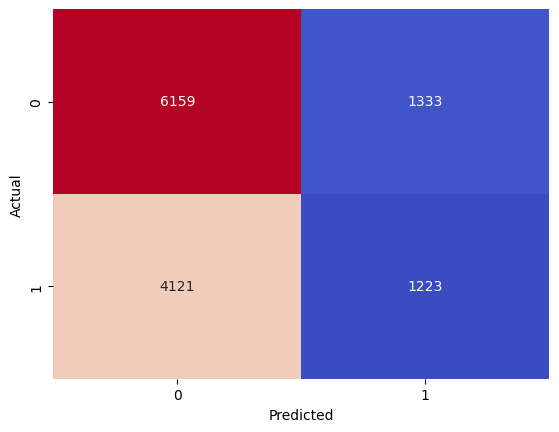

In [45]:
sns.heatmap(cm,fmt='', cmap='coolwarm', cbar=False, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

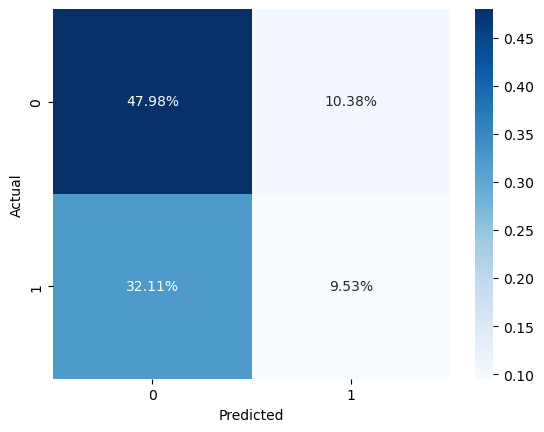

In [46]:
sns.heatmap(cm/np.sum(cm),fmt='.2%', cmap='Blues', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()